In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
import glob
import warnings
warnings.filterwarnings('ignore')

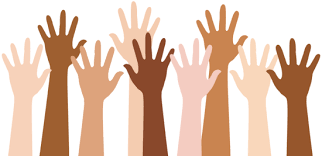

 # Hand movement classification

The purpose of the work is to classify between three different situations in the way people communicate with each other. The first is a spontaneous (autonomous) situation in which two people move their hands freely in front of each other. The second is a synchronous movement in which the two people move their hands together and the third is a movement in a single position. Where only one side moves the hands.
The idea is to look at the patterns of the hands and try to deduce from them whether it is a situation alone, spontaneous or synchronous.

Alone mode: Each participant, in their turn, is asked to move their hand freely over the Leap-Motion controller.

Autonomous mode: The two participants can see each others' movement during the experiment.

Synchronization mode: The two participants are asked to moved in synchronization. They can interpret synchronization as they wish.

### On the other hand...

* Upload data
* Turn into dataframe
* * Clean, check balance, info etc
* * Remove 7 seconds
* Visualize
* PCA
* Divide into train, test etc
* Models
* * Confusion matrices
* validation
* Summary
* * Comparison

spontan
alone
sync

for each train and validation. dont touch validation til end
get train and test
take from each person those 3 files
seperate to 
spontan
alone
sync
one person should be the test

os.list.dir function that you can go through list with and then merge
need to merge left and right to one row
leave only every 5th row, 1st and 6th

in alone connect right hand
files are different sizes so just take smaller ones

This is the list of features in the data:

In [151]:
Columns = [['Time', 'Frame ID','Hand Type'  '# hands', 'Position X', 
            'Position Y', 'Position Z', 'Velocity X', 'Velocity Y', 
            'Velocity Z', 'Pitch', 'Roll', 'Yaw', 'Wrist Pos X', 
            'Wrist Pos Y', 'Wrist Pos Z', 'Elbow pos X', 'Elbow Pos Y', 
            'Elbow Pos Z', 'Grab Strenth', 'Grab Angle', 'Pinch Strength']]           

Let's upload the training data:

Let's create a function to efficiently upload the data to the right data frame, according to the mode it is.

In [166]:
def Makedata(Names):
    li = []
    for i,name in enumerate(Names):
        all_files = glob.glob(name + "/*.csv")
        labels = ["Spontan", "Sync" , "Alone"]
        for filename in all_files:
            df = pd.read_csv(filename, index_col=None, header=0)
            for j,label in enumerate(labels):
                if label in filename:
                    df["Label"] = j
                    df["Name"] = i
                    df = (df[df["Time"] > (df["Time"][0]+7)]) # remove the first 7 sec from each train
            li.append(df)
    # merge data frames.
    frame = pd.concat(li, axis=0, ignore_index=True)
    # Make hand type to 0 or 1.
    frame.loc[(frame[' Hand Type'] == 'left') , " Hand Type"] = int(0)
    frame.loc[(frame[' Hand Type'] == 'right') , " Hand Type"] = int(1)
    frame[' Hand Type'] = frame[' Hand Type'].astype(int)
    return frame

In [187]:
address = glob.glob(r'/Users/nnussbaum/Ariel/extraFiles/Training/' + "/*")
frame = Makedata(address)
frame.head(10)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,Label,Name
0,619.9325,71525,0,1,-125.9596,168.4602,-27.114670,265.82160,-326.39930,241.7092,...,118.5998,-8.304316,-364.7364,-32.55849,85.38065,0.0,0.000000,0.0,2,0
1,619.9495,71527,0,1,-123.4033,165.2152,-24.034270,123.02550,-172.08610,171.8766,...,116.1477,-6.489561,-366.1621,-29.70646,89.85723,0.0,0.000000,0.0,2,0
2,619.9656,71529,0,1,-119.4215,159.7905,-20.979390,204.39310,-283.77100,153.4038,...,113.0303,-5.492952,-369.1355,-25.86688,92.54630,0.0,0.000000,0.0,2,0
3,619.9825,71531,0,1,-117.6987,156.9946,-18.672850,104.39600,-135.59880,124.5371,...,111.5442,-4.709237,-371.1240,-23.94903,93.60573,0.0,0.000000,0.0,2,0
4,619.9995,71533,0,1,-114.6961,152.9964,-15.699020,118.92250,-159.14510,166.9148,...,111.4075,-4.421209,-375.1566,-23.01028,88.07614,0.0,0.000000,0.0,2,0
5,620.0154,71535,0,1,-114.0516,151.1051,-12.367970,77.81772,-161.02190,198.4248,...,113.7657,-3.468150,-381.8506,-22.76634,75.90390,0.0,0.035190,0.0,2,0
6,620.0324,71536,0,1,-113.0556,149.4217,-10.467600,115.10040,-194.51480,219.5945,...,113.3798,-2.931238,-384.1937,-23.40184,69.47894,0.0,0.096545,0.0,2,0
7,620.0485,71538,0,1,-112.9368,146.4524,-6.776668,-50.17619,-73.27056,219.2248,...,115.2849,-1.923731,-387.0169,-26.66047,58.95325,0.0,0.171622,0.0,2,0
8,620.0653,71540,0,1,-112.1661,143.3890,-3.413068,10.07872,-116.69510,183.8517,...,117.2872,-1.336222,-388.7102,-27.80871,50.35883,0.0,0.414857,0.0,2,0
9,620.0815,71542,0,1,-110.8061,141.5307,-0.763288,199.56670,-241.62670,142.7272,...,120.7500,-1.093778,-388.9531,-26.04114,45.70087,0.0,0.589233,0.0,2,0


In [198]:
print(frame.shape)
print(frame.isna().any())

(300397, 24)
Time               False
 Frame ID          False
 Hand Type         False
 # hands           False
 Position X        False
 Position Y        False
 Position Z        False
 Velocity X        False
 Velocity Y        False
 Velocity Z        False
 Pitch             False
 Roll              False
 Yaw               False
 Wrist Pos X       False
 Wrist Pos Y       False
 Wrist Pos Z       False
 Elbow pos X       False
 Elbow Pos Y       False
 Elbow Pos Z       False
 Grab Strenth      False
 Grab Angle        False
 Pinch Strength    False
Label              False
Name               False
dtype: bool


In [197]:
print(frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300397 entries, 0 to 300396
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             300397 non-null  float64
 1    Frame ID        300397 non-null  int64  
 2    Hand Type       300397 non-null  int64  
 3    # hands         300397 non-null  int64  
 4    Position X      300397 non-null  float64
 5    Position Y      300397 non-null  float64
 6    Position Z      300397 non-null  float64
 7    Velocity X      300397 non-null  float64
 8    Velocity Y      300397 non-null  float64
 9    Velocity Z      300397 non-null  float64
 10   Pitch           300397 non-null  float64
 11   Roll            300397 non-null  float64
 12   Yaw             300397 non-null  float64
 13   Wrist Pos X     300397 non-null  float64
 14   Wrist Pos Y     300397 non-null  float64
 15   Wrist Pos Z     300397 non-null  float64
 16   Elbow pos X     300397 non-null  floa

Let's upload the testing data:

In [186]:
address1 = glob.glob(r'/Users/nnussbaum/Ariel/extraFiles/Validation/' + "/*")
frame1 = Makedata(address1)
frame1.head(10)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,Label,Name
0,153.3970,20542,1,2,116.75470,166.9477,-20.82885,25.88344,-24.250830,-33.90162,...,121.3219,29.08213,245.2854,-54.15136,159.41980,0.0,0.000000,0.000000,1,0
1,153.3970,20542,0,2,-77.03016,199.2262,18.11893,-16.44282,-10.225020,-41.09758,...,130.9721,17.86045,-169.9897,-93.44743,11.36950,0.0,0.449641,0.181469,1,0
2,153.4131,20544,1,2,116.80710,166.0322,-21.34337,2.35236,-52.896870,-28.08331,...,121.5414,29.58164,243.7403,-52.34761,163.38720,0.0,0.000000,0.000000,1,0
3,153.4131,20544,0,2,-76.84715,198.6608,17.40147,11.60777,-26.097500,-42.28217,...,130.3360,17.53547,-171.1309,-93.72797,10.93816,0.0,0.337501,0.159251,1,0
4,153.4296,20546,1,2,116.73900,165.0588,-21.79521,-10.11920,-59.440770,-24.87830,...,121.7375,30.14712,245.6555,-47.76900,167.77390,0.0,0.000000,0.000000,1,0
5,153.4296,20546,0,2,-76.18059,197.5708,16.54493,47.10982,-60.376890,-48.66555,...,129.1100,17.29883,-173.4897,-94.14534,11.39081,0.0,0.271751,0.162548,1,0
6,153.4462,20548,1,2,116.41550,163.9005,-22.19717,-21.00471,-66.302830,-23.33161,...,121.7746,30.68066,248.7033,-42.40138,171.97310,0.0,0.000000,0.000000,1,0
7,153.4462,20548,0,2,-75.41199,196.7055,15.70978,43.26208,-44.474460,-47.26429,...,128.1449,17.11410,-175.9467,-94.17613,12.78497,0.0,0.220099,0.119289,1,0
8,153.4628,20550,1,2,115.98850,162.8186,-22.57689,-23.71579,-58.768430,-20.20117,...,121.6797,30.99374,251.8123,-37.17968,175.55400,0.0,0.000000,0.000000,1,0
9,153.4628,20550,0,2,-74.87393,196.4057,14.88953,26.89678,-6.413064,-47.78307,...,127.7972,16.92846,-177.7725,-93.79881,14.30938,0.0,0.239776,0.115939,1,0


In [195]:
print(frame1.shape)
print(frame1.isna().any())

(81528, 24)
Time               False
 Frame ID          False
 Hand Type         False
 # hands           False
 Position X        False
 Position Y        False
 Position Z        False
 Velocity X        False
 Velocity Y        False
 Velocity Z        False
 Pitch             False
 Roll              False
 Yaw               False
 Wrist Pos X       False
 Wrist Pos Y       False
 Wrist Pos Z       False
 Elbow pos X       False
 Elbow Pos Y       False
 Elbow Pos Z       False
 Grab Strenth      False
 Grab Angle        False
 Pinch Strength    False
Label              False
Name               False
dtype: bool


In [184]:
print(frame1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81528 entries, 0 to 81527
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             81528 non-null  float64
 1    Frame ID        81528 non-null  int64  
 2    Hand Type       81528 non-null  int64  
 3    # hands         81528 non-null  int64  
 4    Position X      81528 non-null  float64
 5    Position Y      81528 non-null  float64
 6    Position Z      81528 non-null  float64
 7    Velocity X      81528 non-null  float64
 8    Velocity Y      81528 non-null  float64
 9    Velocity Z      81528 non-null  float64
 10   Pitch           81528 non-null  float64
 11   Roll            81528 non-null  float64
 12   Yaw             81528 non-null  float64
 13   Wrist Pos X     81528 non-null  float64
 14   Wrist Pos Y     81528 non-null  float64
 15   Wrist Pos Z     81528 non-null  float64
 16   Elbow pos X     81528 non-null  float64
 17   Elbow Pos Y

In [ ]:
def make_Alone(frame):
    HandRight = pd.read_csv("/Users/ortrabelsi/Desktop/מטלה דימות נתונים/סופי 1/HandRight/HandRight.csv", index_col=None, header=0)
    # drop rows with nan value
    HandRight.dropna(inplace= True)
    # drop errors
    HandRight = HandRight[HandRight[" Hand Type"] == "right"]

    HandRight.reset_index(inplace= True, drop = True)
    alone = frame[frame['Label']==2]

    # adding Right hand for each one and merge.
    temp_list = []
    right = HandRight
    right.columns += "_"
    for i in range(9):
        left = alone[alone["Name"] == i]
        left.reset_index(inplace= True, drop = True)
        temp_list.append(pd.concat([left, right], axis=1, ignore_index= False).dropna())

    alone = pd.concat(temp_list, axis=0, ignore_index=True)

    # delete Name from "Alone" 
    alone.drop(["Name","Time_"], axis=1, inplace=True)
    return alone

In [ ]:
def Make_not_Alone(frame):
    not_alone = frame[frame['Label']!=2]

    L = not_alone[(not_alone[' Hand Type'] == 0)]
    R = not_alone[(not_alone[' Hand Type'] == 1)]

    L = L.set_index(['Time', 'Name'])
    R = R.set_index(['Time', 'Name'])
    R.columns += "_"

    not_alone = pd.concat([L, R], axis=1)
    not_alone.reset_index(inplace= True)
    not_alone.drop(["Name","Label_"],axis=1, inplace=True)


    return not_alone

In [ ]:
# Marge all the data again
alone = make_Alone(frame)
not_alone = Make_not_Alone(frame)

# final df
df = pd.concat([not_alone, alone], axis=0, ignore_index=True)


# drop Irrelevant and take sample every 10 row
df = df.drop(['Time', ' Frame ID',' Hand Type',' # hands',' Hand Type_',' # hands_'
           ,' Frame ID_'], axis=1)
df = df[::10]
df

## Divide data into training and testing sets

In [ ]:
x = df.drop('Label', axis = 1)
y = df.Label
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
# Change the name back to x_train and x_test
scal_x_train = pd.DataFrame(StandardScaler().fit(x_train).transform(x_train),columns=X.columns)
scal_x_test = pd.DataFrame(StandardScaler().fit(x_train).transform(x_test),columns=X.columns)

Let's remember what the confusion matrix shows us:

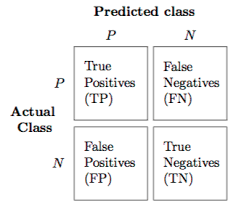

## Decision Tree Classifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 2)
dtree.fit(x_train, y_train)
prediction = dtree.predict(x_test)
dtc_a=accuracy_score(prediction,y_test)
print(dtc_a)

Confusion matrix:

In [ ]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## Pipeline

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(x_train, y_train)
prediction = pipe.predict(x_test)
ppl_a=accuracy_score(prediction,y_test)
print(ppl_a)

Confusion matrix:

In [ ]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=150)
logreg.fit(x_train, y_train)
prediction = logreg.predict(x_test)
log_a = accuracy_score(prediction, y_test)
print(log_a)

Confusion matrix:

In [ ]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## K Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
knn_a=accuracy_score(y_test, prediction)
print(knn_a)

Confusion matrix:

In [ ]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

# Ensemble Learning models

## Random Forest Classifier

In [ ]:
RForest = RandomForestClassifier()
RForest.fit(x_train, y_train)
prediction = RForest.predict(x_test)
rfc_a=accuracy_score(prediction,y_test)
print(rfc_a)

Confusion matrix:

In [ ]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## AdaBoost Classifier

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(x_train,y_train)
prediction = ada.predict(x_test)
ada_a = accuracy_score(y_test, prediction)
print(ada_a)

Confusion matrix:

In [ ]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## XGB Classifier

In [ ]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)
prediction = xgb.predict(x_test)
xgb_a = accuracy_score(y_test, prediction)
print(xgb_a)

Confusion matrix:

In [ ]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(x_train,y_train)
prediction = gbc.predict(x_test)
gbc_a = accuracy_score(y_test, prediction)
print(gbc_a)

Confusion matrix:

In [ ]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

## Voting Classifier

In [ ]:
r1 = logreg
r2 = dtree
r3 = KNeighborsClassifier()
r4 = AdaBoostClassifier()
r5 = GradientBoostingClassifier()
r6 = RandomForestClassifier(n_estimators=10, random_state=42)
r7 = make_pipeline(StandardScaler(),LinearSVC(random_state=1, tol=1e-5))

In [ ]:
vr = VotingClassifier([('lr', logreg), ('dt', dtree),('knn', knn), ('rfc',RForest)])
vr.fit(x_train,y_train)
prediction = vr.predict(x_test)
vr_a = accuracy_score(y_test, prediction)
print(vr_a)

Confusion matrix:

In [ ]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='g')

In summary:

# Model Accuracy Results Comparison

In [ ]:
data = [[rfc_a*100, dtc_a*100, ppl_a*100, log_a*100, knn_a*100, ada_a*100, xgb_a*100, gbc_a*100, vr_a*100] ]
models=['Random Forest','Decision Tree', 'Pipeline','Logistic Regression','KNN', 'AdaBoost', 'XGB' , 'Gradient Boosting','Voting']
pd.DataFrame(data, columns = models , index=["Accuracy Score (%)"])

In [ ]:
models=['Random Forest','Decision Tree', 'Pipeline','Logistic Regression','KNN', 'AdaBoost', 'XGB' , 'Gradient Boosting','Voting']
data = [rfc_a*100, dtc_a*100, ppl_a*100, log_a*100, knn_a*100, ada_a*100, xgb_a*100, gbc_a*100, vr_a*100] 
plt.figure(figsize=(10,10))
plt.plot (models, data, linestyle=':',color='purple')
plt.title("Model Accuracy Results Comparison", fontsize = 15)
plt.xlabel("Classifier", fontsize=15)
plt.ylabel("Accuracy Score (%)", fontsize = 15)
plt.figure(facecolor='w', edgecolor='k')
plt.show()

### The best result we've achieved was

The end.